In [11]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_MLE_US = df[(df['job_title_short'] == 'Machine Learning Engineer') & (df['job_country'] == 'United States')].copy()

In [13]:
df_MLE_US['job_posted_month_no'] = df_MLE_US['job_posted_date'].dt.month

In [14]:
df_MLE_US_exploded = df_MLE_US.explode('job_skills')

In [15]:
df_MLE_US_exploded


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
883,Machine Learning Engineer,Data Science - Machine Learning Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-03-28 13:08:13,False,False,United States,None,NaN,NaN,Brooksource,go,"{'libraries': ['hadoop', 'spark'], 'other': ['...",3
883,Machine Learning Engineer,Data Science - Machine Learning Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-03-28 13:08:13,False,False,United States,None,NaN,NaN,Brooksource,sql,"{'libraries': ['hadoop', 'spark'], 'other': ['...",3
883,Machine Learning Engineer,Data Science - Machine Learning Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-03-28 13:08:13,False,False,United States,None,NaN,NaN,Brooksource,python,"{'libraries': ['hadoop', 'spark'], 'other': ['...",3
883,Machine Learning Engineer,Data Science - Machine Learning Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-03-28 13:08:13,False,False,United States,None,NaN,NaN,Brooksource,r,"{'libraries': ['hadoop', 'spark'], 'other': ['...",3
883,Machine Learning Engineer,Data Science - Machine Learning Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-03-28 13:08:13,False,False,United States,None,NaN,NaN,Brooksource,nosql,"{'libraries': ['hadoop', 'spark'], 'other': ['...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,bigquery,"{'cloud': ['bigquery'], 'libraries': ['hadoop'...",4
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,hadoop,"{'cloud': ['bigquery'], 'libraries': ['hadoop'...",4
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,spark,"{'cloud': ['bigquery'], 'libraries': ['hadoop'...",4
783990,Machine Learning Engineer,"Machine Learning Scientist, Ads","Mountain View, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-06 06:03:26,False,False,United States,year,172500.0,NaN,Wayfair Inc.,airflow,"{'cloud': ['bigquery'], 'libraries': ['hadoop'...",4


In [16]:
df_MLE_US_pivot = df_MLE_US_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_MLE_US_pivot.loc['Total'] = df_MLE_US_pivot.sum()

df_MLE_US_pivot = df_MLE_US_pivot[df_MLE_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_MLE_US_pivot = df_MLE_US_pivot.drop('Total')

df_MLE_US_pivot 

job_skills,python,sql,aws,tensorflow,pytorch,spark,java,azure,r,scikit-learn,...,flutter,graphql,electron,elixir,rshiny,react.js,selenium,sqlite,unity,vmware
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,41,20,16,20,17,15,10,8,18,5,...,0,0,0,0,0,0,0,0,0,0
2,38,24,18,15,10,19,10,12,13,5,...,0,0,0,0,0,0,0,0,0,0
3,45,19,20,20,17,24,12,7,19,7,...,0,0,0,0,0,0,0,0,0,0
4,33,12,15,15,18,16,6,9,3,14,...,0,0,0,0,0,0,1,0,0,0
5,38,19,9,9,7,19,19,5,4,6,...,0,0,0,0,0,0,0,0,0,0
6,39,18,19,17,17,19,16,6,11,6,...,0,0,0,1,0,0,0,0,0,0
7,43,15,24,20,20,17,15,13,9,10,...,0,0,0,0,0,0,0,0,0,0
8,47,25,25,19,18,8,13,10,11,10,...,0,0,0,0,0,0,0,0,0,0
9,72,36,29,32,28,19,17,15,17,14,...,0,0,0,0,1,0,0,0,1,0


In [17]:
MLE_totals = df_MLE_US.groupby('job_posted_month_no').size()

In [18]:
df_MLE_US_percent = df_MLE_US_pivot.div(MLE_totals/100, axis=0)

In [19]:
df_MLE_US_percent = df_MLE_US_percent.reset_index()
df_MLE_US_percent['job_posted_month'] = df_MLE_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_MLE_US_percent = df_MLE_US_percent.set_index('job_posted_month')
df_MLE_US_percent = df_MLE_US_percent.drop(columns='job_posted_month_no')

df_MLE_US_percent

job_skills,python,sql,aws,tensorflow,pytorch,spark,java,azure,r,scikit-learn,...,flutter,graphql,electron,elixir,rshiny,react.js,selenium,sqlite,unity,vmware
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,68.333333,33.333333,26.666667,33.333333,28.333333,25.000000,16.666667,13.333333,30.000000,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,67.857143,42.857143,32.142857,26.785714,17.857143,33.928571,17.857143,21.428571,23.214286,8.928571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,76.271186,32.203390,33.898305,33.898305,28.813559,40.677966,20.338983,11.864407,32.203390,11.864407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,64.705882,23.529412,29.411765,29.411765,35.294118,31.372549,11.764706,17.647059,5.882353,27.450980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,0.000000,0.000000,0.000000
May,77.551020,38.775510,18.367347,18.367347,14.285714,38.775510,38.775510,10.204082,8.163265,12.244898,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,81.250000,37.500000,39.583333,35.416667,35.416667,39.583333,33.333333,12.500000,22.916667,12.500000,...,0.000000,0.000000,0.000000,2.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,66.153846,23.076923,36.923077,30.769231,30.769231,26.153846,23.076923,20.000000,13.846154,15.384615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,69.117647,36.764706,36.764706,27.941176,26.470588,11.764706,19.117647,14.705882,16.176471,14.705882,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,63.716814,31.858407,25.663717,28.318584,24.778761,16.814159,15.044248,13.274336,15.044248,12.389381,...,0.000000,0.000000,0.000000,0.000000,0.884956,0.000000,0.000000,0.000000,0.884956,0.000000


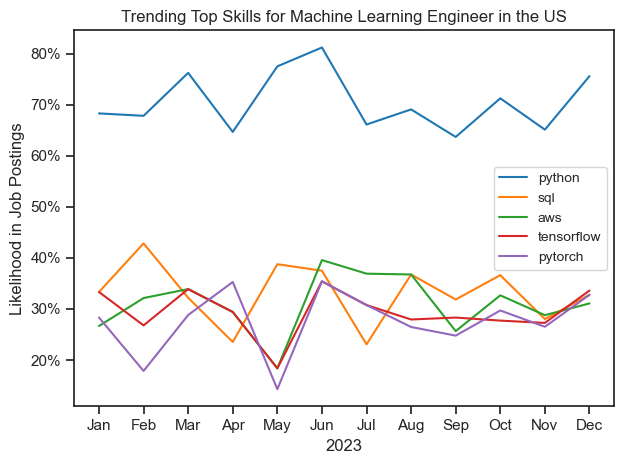

In [20]:
df_plot = df_MLE_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Trending Top Skills for Machine Learning Engineer in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.legend(fontsize = 10)


plt.tight_layout()